Oleh:

```
NIM - NAMA
```


About Dataset:
Dataset ini berisi informasi tentang transaksi belanja pelanggan, dengan kolom sebagai berikut:

- `invoice_no`: Nomor faktur
- `customer_id`: ID pelanggan
- `gender`: Jenis kelamin pelanggan
- `age`: Usia pelanggan
- `category`: Kategori produk
- `quantity`: Jumlah produk yang dibeli
- `price`: Harga total
- `payment_method`: Metode pembayaran
- `invoice_date`: Tanggal faktur
- `shopping_mall`: Nama pusat perbelanjaan

---
Tugas:
1. Lakukan grafik untuk mengetahui keterhubungan antara age dan quantity.
2. lakukan grafik untuk mengetahui keterhubungan antara gender dan price
3. lakukan grafik untuk mengetahui jumlah payment methode (gunakan bar chart)
4. lakukan grafi untuk mengetahui jumlah category yang terjual (gunakan barchart)
5. lakukan grafik keterhubungan antara umur dengan payment method
---

# Import Libary

In [62]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [47]:
df=pd.read_csv('Dataset/customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [49]:
# Stastical Description of Data
df.describe()


,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [50]:
df.shape

(99457, 10)

In [51]:
# Check for missing values
missing_values = df.isnull().sum()

# Check the data types
data_types = df.dtypes

missing_values, data_types

(invoice_no        0
 customer_id       0
 gender            0
 age               0
 category          0
 quantity          0
 price             0
 payment_method    0
 invoice_date      0
 shopping_mall     0
 dtype: int64,
 invoice_no         object
 customer_id        object
 gender             object
 age                 int64
 category           object
 quantity            int64
 price             float64
 payment_method     object
 invoice_date       object
 shopping_mall      object
 dtype: object)

In [52]:
# Mengubah 'invoice_date' menjadi datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)

# Verify the changes
df.dtypes

invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
dtype: object

In [53]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park


## Distribusi Dari dataset
Distribusi data adalah cara untuk menggambarkan bagaimana data tersebar atau terseksi di sepanjang nilai-nilai yang mungkin. Ini memberikan pemahaman tentang pola atau karakteristik dari kumpulan data yang dimiliki. Pemahaman distribusi data sangat penting dalam analisis statistik karena dapat mempengaruhi pemilihan metode statistik yang tepat serta interpretasi hasil analisis.



C:\Users\kuzup\AppData\Local\Temp\ipykernel_17460\136416595.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette=palette)
C:\Users\kuzup\AppData\Local\Temp\ipykernel_17460\136416595.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='category', palette=palette)
C:\Users\kuzup\AppData\Local\Temp\ipykernel_17460\136416595.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='payment_method', palette=palette)
C:\Users\kuzup\AppData\Local\Temp\ipykernel_17460\136416595.py:51: FutureWarnin

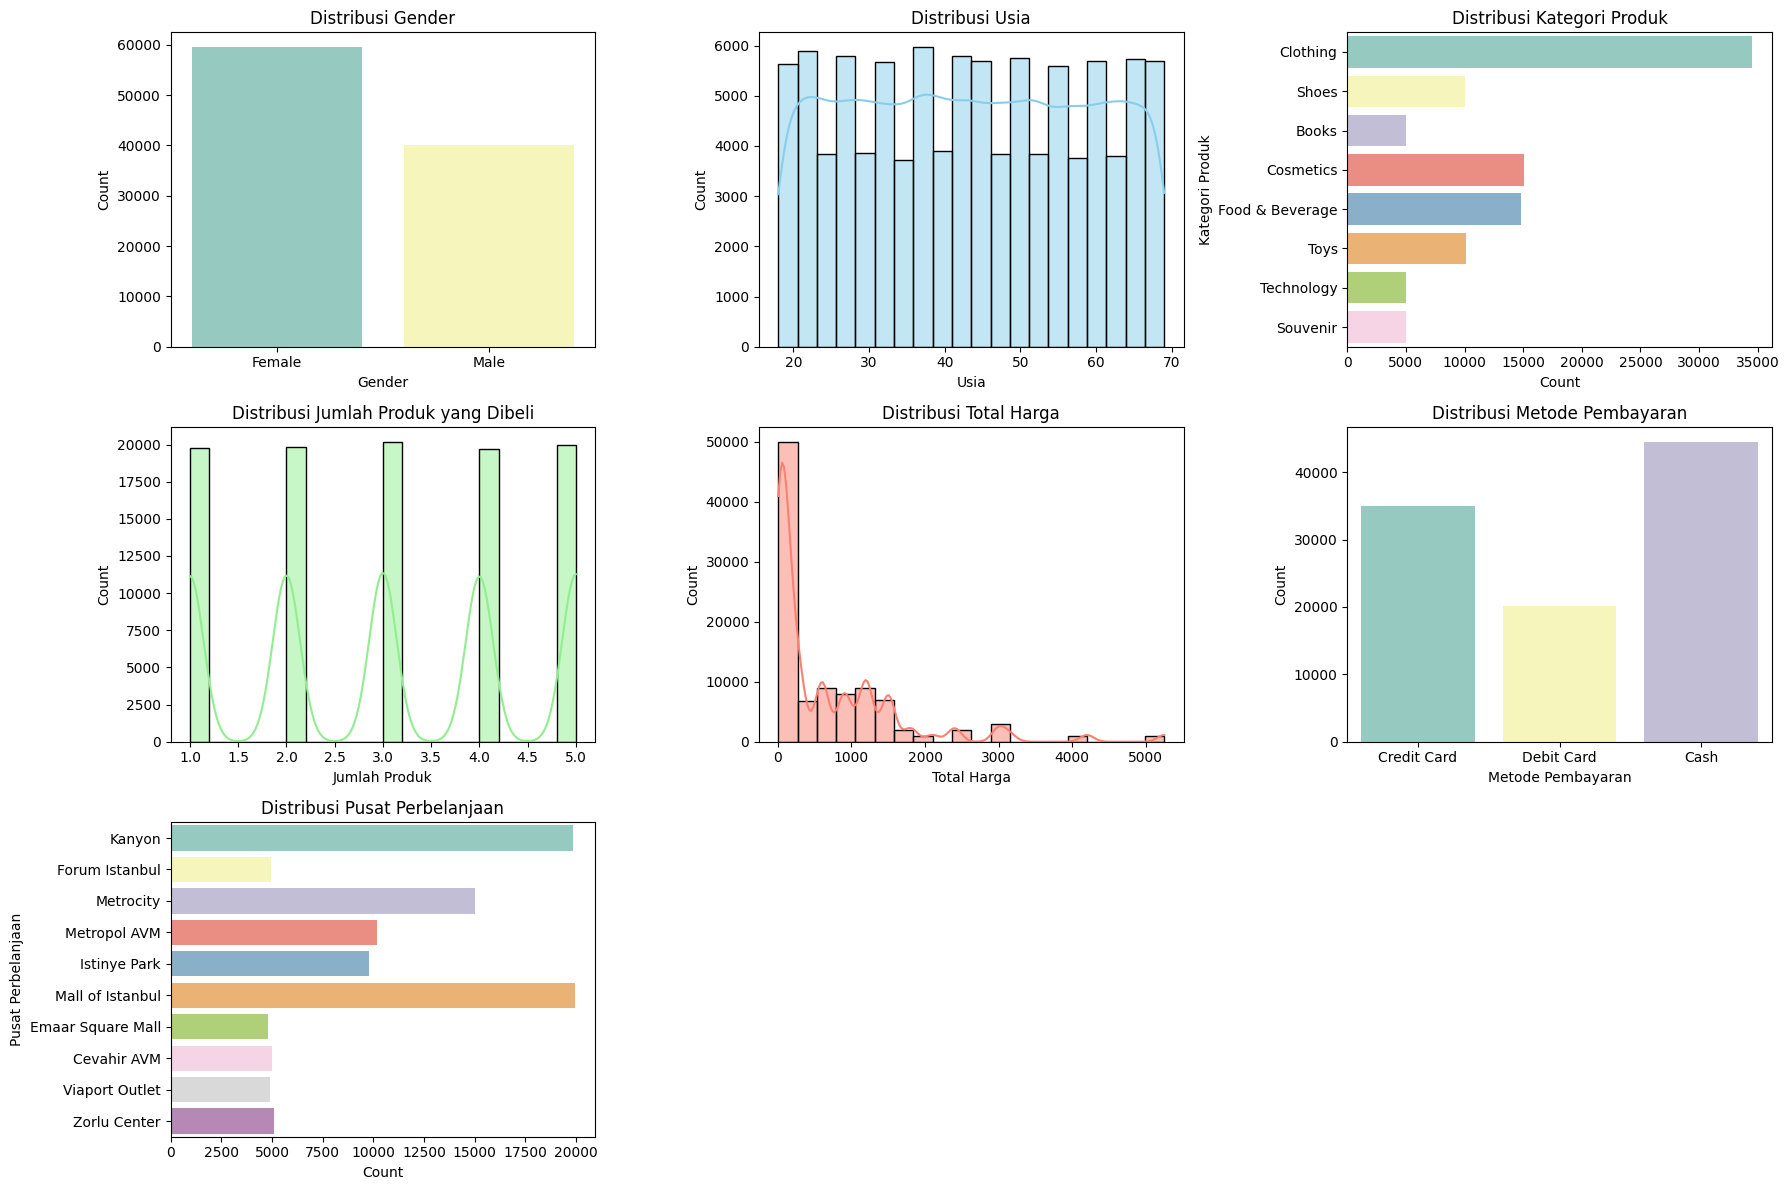

In [54]:
# Create a figure with specific size
plt.figure(figsize=(18, 12))

# Define color palette
palette = 'Set3'

# Plot 1: Distribusi gender
plt.subplot(3, 3, 1)
sns.countplot(data=df, x='gender', palette=palette)
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plot 2: Distribusi usia
plt.subplot(3, 3, 2)
sns.histplot(data=df, x='age', bins=20, kde=True, color='skyblue')
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Count')

# Plot 3: Distribusi kategori produk
plt.subplot(3, 3, 3)
sns.countplot(data=df, y='category', palette=palette)
plt.title('Distribusi Kategori Produk')
plt.xlabel('Count')
plt.ylabel('Kategori Produk')

# Plot 4: Distribusi jumlah produk
plt.subplot(3, 3, 4)
sns.histplot(data=df, x='quantity', bins=20, kde=True, color='lightgreen')
plt.title('Distribusi Jumlah Produk yang Dibeli')
plt.xlabel('Jumlah Produk')
plt.ylabel('Count')

# Plot 5: Distribusi harga total
plt.subplot(3, 3, 5)
sns.histplot(data=df, x='price', bins=20, kde=True, color='salmon')
plt.title('Distribusi Total Harga')
plt.xlabel('Total Harga')
plt.ylabel('Count')

# Plot 6: Distribusi metode pembayaran
plt.subplot(3, 3, 6)
sns.countplot(data=df, x='payment_method', palette=palette)
plt.title('Distribusi Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Count')

# Plot 7: Distribusi pusat perbelanjaan (shopping mall)
plt.subplot(3, 3, 7)
sns.countplot(data=df, y='shopping_mall', palette=palette)
plt.title('Distribusi Pusat Perbelanjaan')
plt.xlabel('Count')
plt.ylabel('Pusat Perbelanjaan')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## 1. Plot grafik untuk mengetahui keterhubungan antara age dan quantity


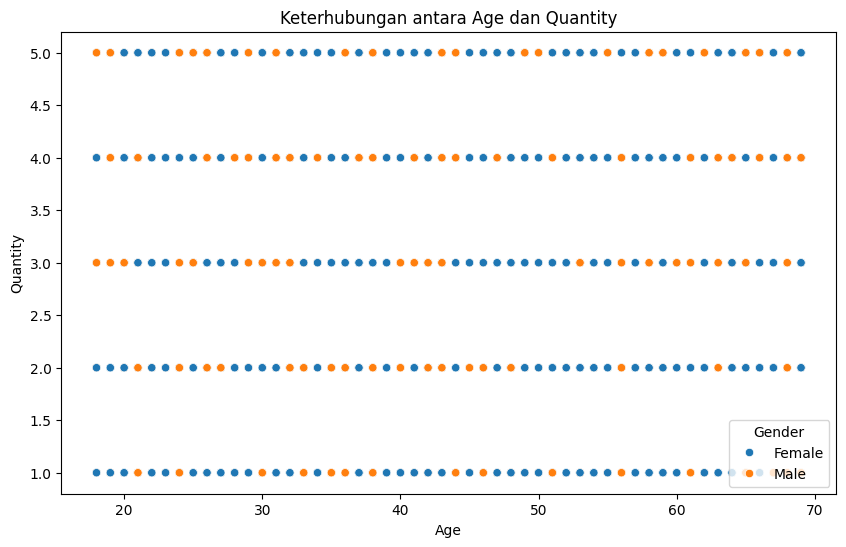

C:\Users\kuzup\AppData\Local\Temp\ipykernel_17460\345454967.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='quantity', data=df, palette='viridis')


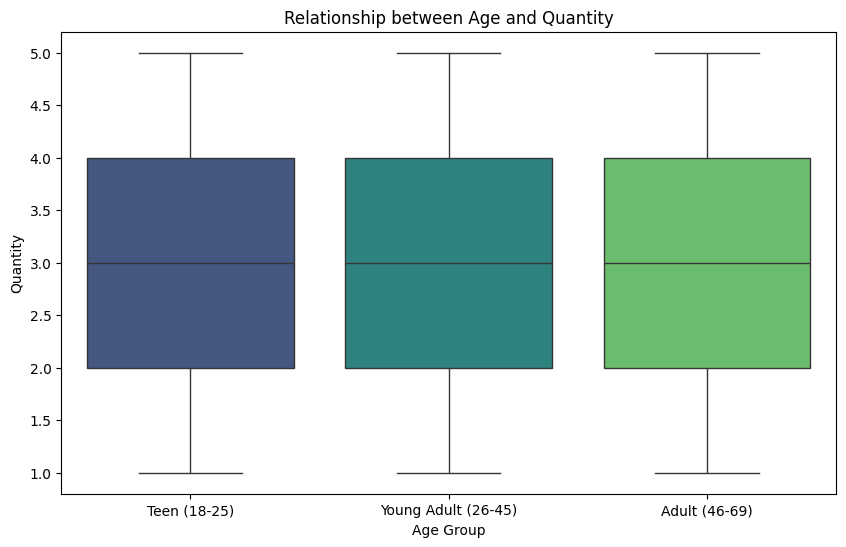

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='quantity', hue='gender')
plt.title('Keterhubungan antara Age dan Quantity')
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.legend(title='Gender')
plt.show()

# Define age groups
bins = [18, 25, 45, 69]
labels = ['Teen (18-25)', 'Young Adult (26-45)', 'Adult (46-69)']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='quantity', data=df, palette='viridis')
plt.title('Relationship between Age and Quantity')
plt.xlabel('Age Group')
plt.ylabel('Quantity')
plt.show()

## 2. Grafik untuk mengetahui keterhubungan antara gender dan price


C:\Users\kuzup\AppData\Local\Temp\ipykernel_17460\409657181.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='price', data=df, palette='muted')


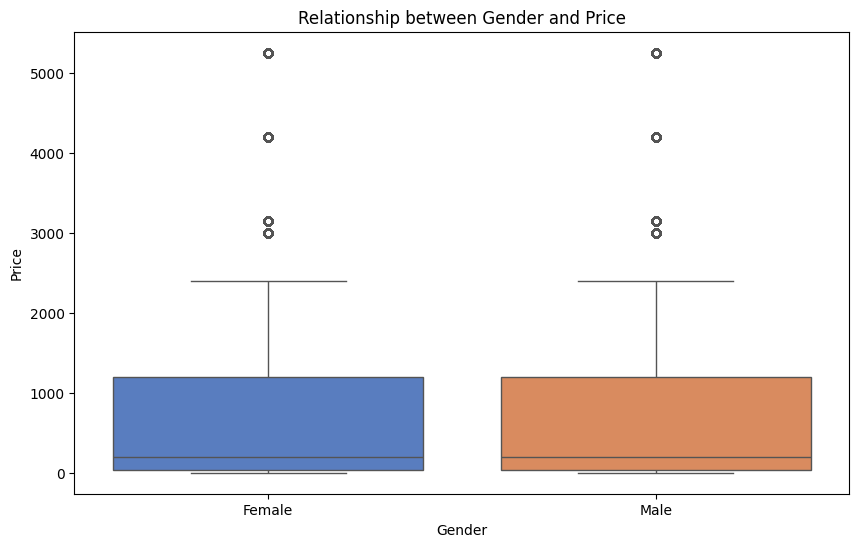

In [56]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='price', data=df, palette='muted')
plt.title('Relationship between Gender and Price')
plt.xlabel('Gender')
plt.ylabel('Price')
plt.show()


## 3. Grafik untuk mengetahui jumlah payment method 


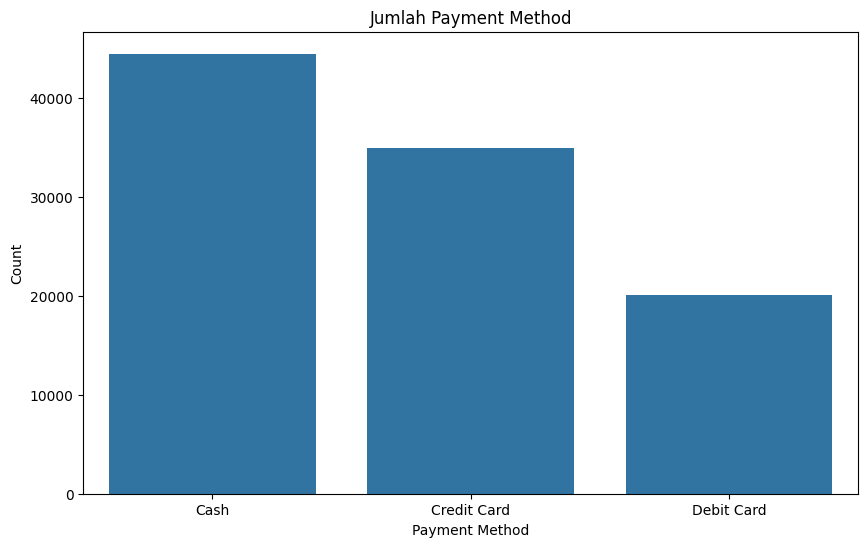

In [57]:
plt.figure(figsize=(10, 6))
payment_counts = df['payment_method'].value_counts()
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.title('Jumlah Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()




## 4. Grafik untuk mengetahui jumlah category yang terjual 


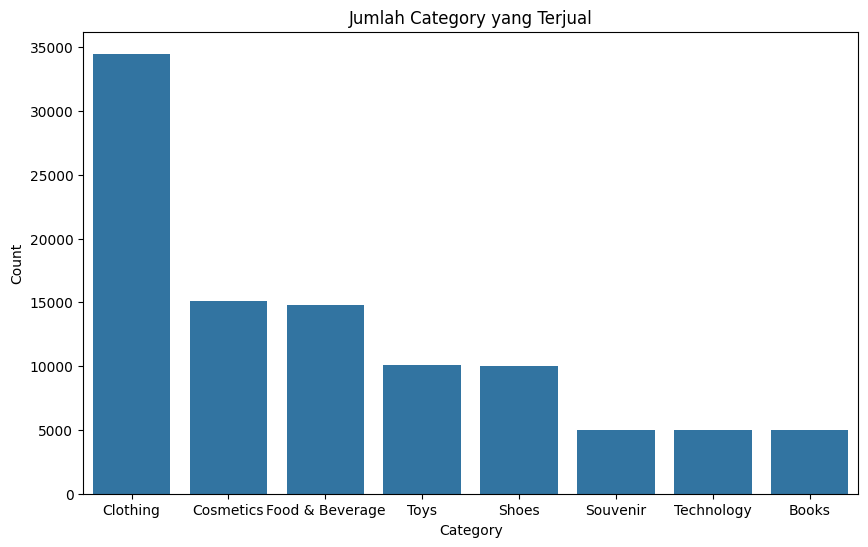

In [58]:
plt.figure(figsize=(10, 6))
category_counts = df['category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Jumlah Category yang Terjual')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()



## 5. Grafik keterhubungan antara age dengan payment method


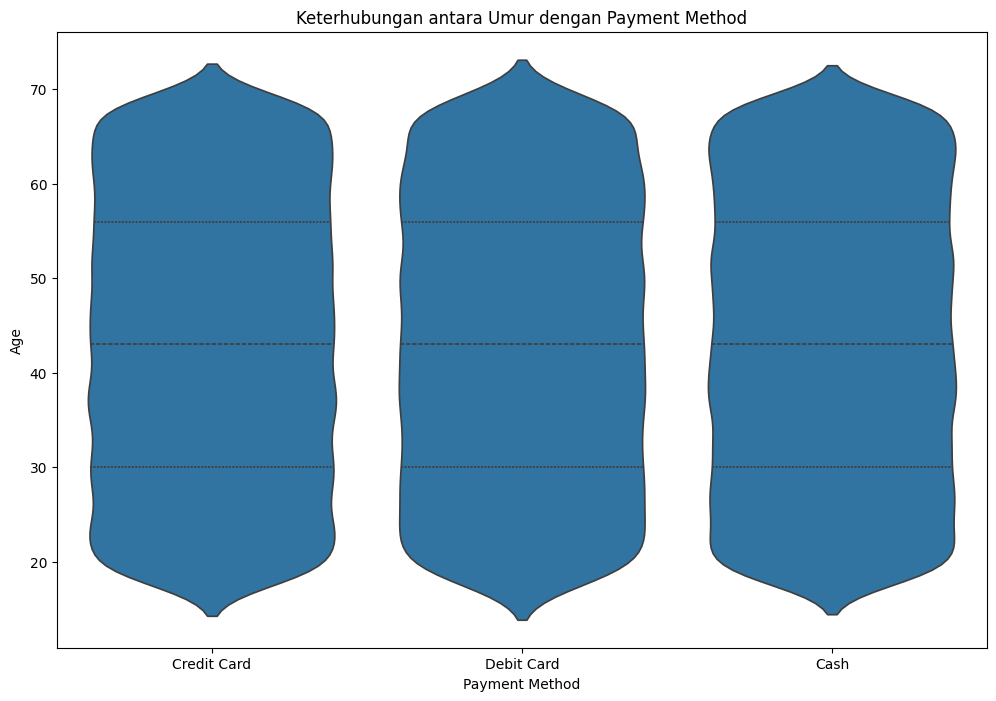

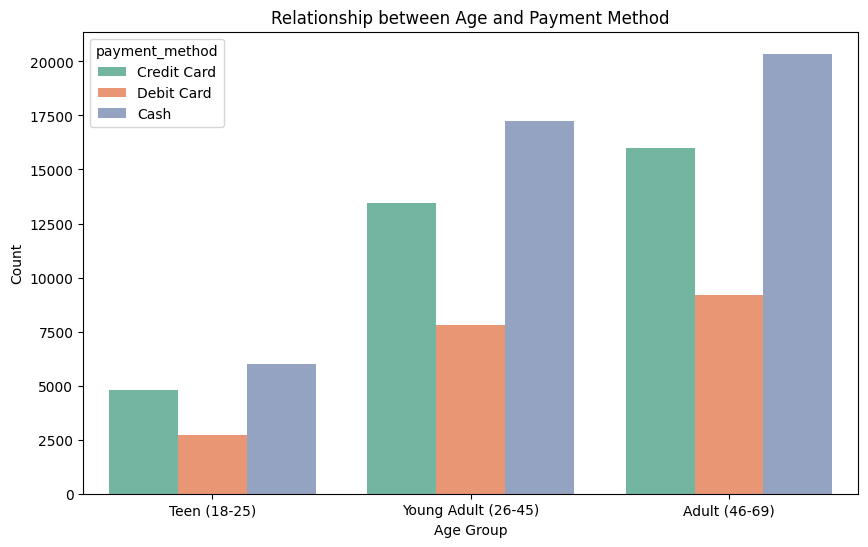

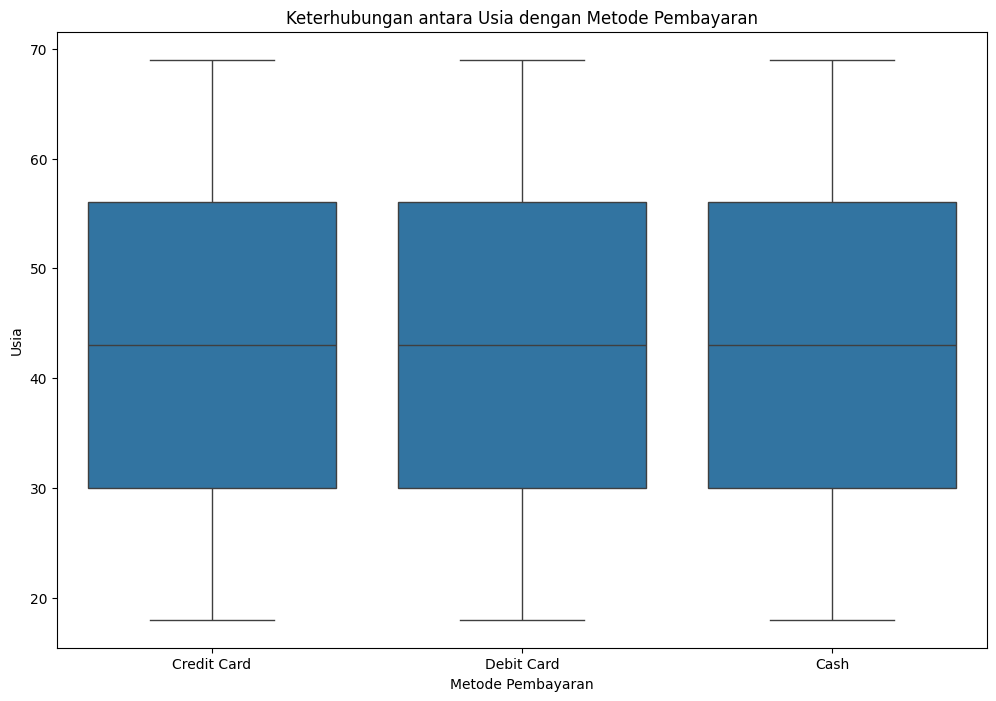

In [59]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='payment_method', y='age', inner='quartile')
plt.title('Keterhubungan antara Umur dengan Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='payment_method', data=df, palette='Set2')
plt.title('Relationship between Age and Payment Method')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='payment_method', y='age')
plt.title('Keterhubungan antara Usia dengan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Usia')
plt.show()

## MORE EDA

### 1. Analisis Tren Waktu Transaksi


In [60]:
# Ekstrak bulan dan tahun dari kolom invoice_date
df['invoice_month'] = df['invoice_date'].dt.to_period('M')
df['invoice_year'] = df['invoice_date'].dt.year
# Hitung jumlah transaksi per bulan
transaction_per_month = df.groupby('invoice_month').size()

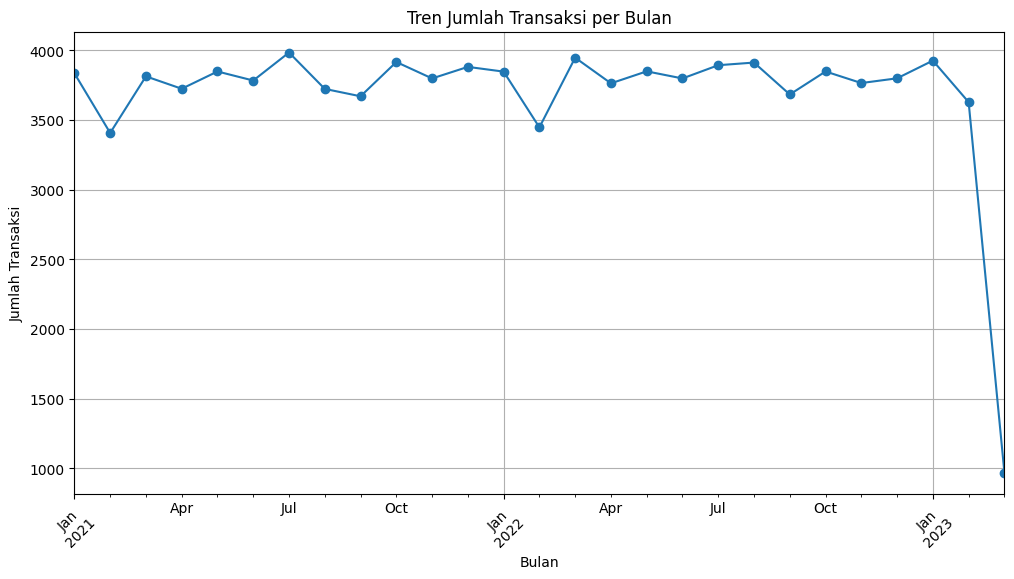

In [61]:
# Plot jumlah transaksi per bulan
plt.figure(figsize=(12, 6))
transaction_per_month.plot(kind='line', marker='o')
plt.title('Tren Jumlah Transaksi per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 2. Segmentasi Pelanggan


c:\Users\kuzup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kuzup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kuzup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kuzup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

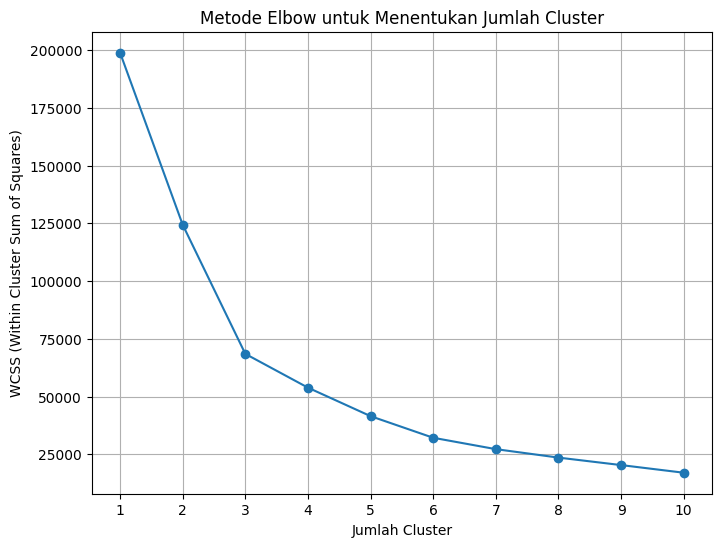

c:\Users\kuzup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kuzup\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


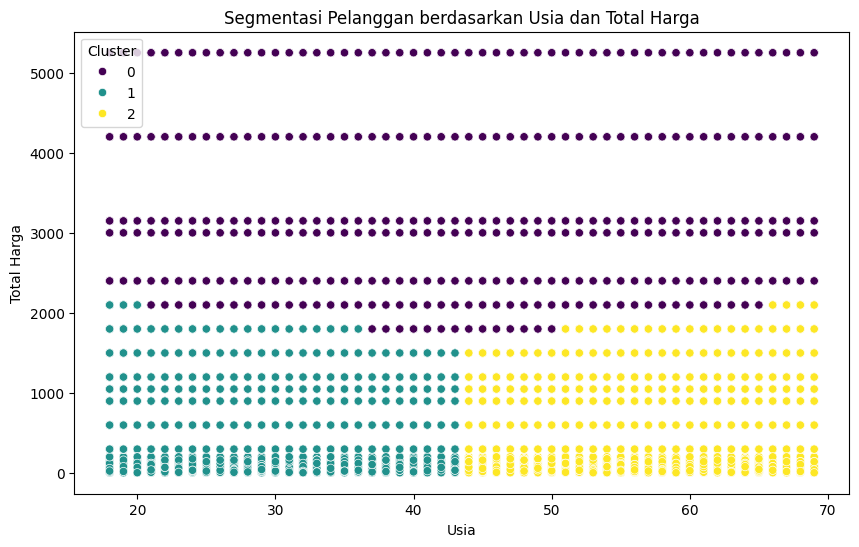

In [63]:
# Seleksi kolom yang digunakan untuk segmentasi
X = df[['age', 'price']]

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah cluster dengan metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Berdasarkan Elbow Method, pilih jumlah cluster
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi segmentasi pelanggan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='price', hue='cluster', palette='viridis')
plt.title('Segmentasi Pelanggan berdasarkan Usia dan Total Harga')
plt.xlabel('Usia')
plt.ylabel('Total Harga')
plt.legend(title='Cluster')
plt.show()

### 3.Analisis Korelasi

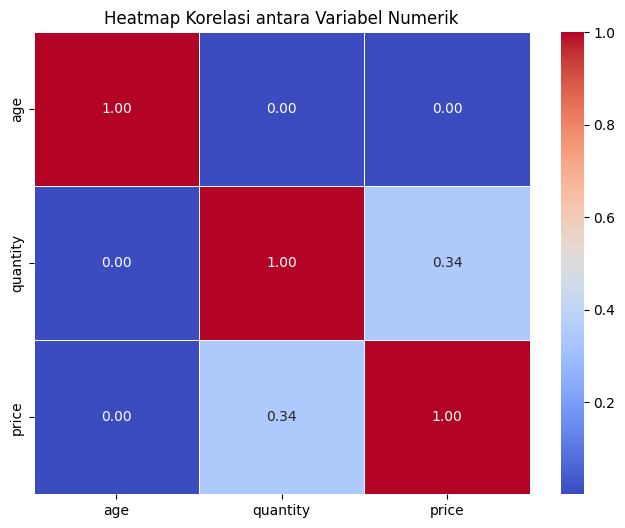

In [64]:
# Hitung korelasi antara variabel numerik
corr_matrix = df[['age', 'quantity', 'price']].corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi antara Variabel Numerik')
plt.show()

### 4. Analisis outlier pada kolom price


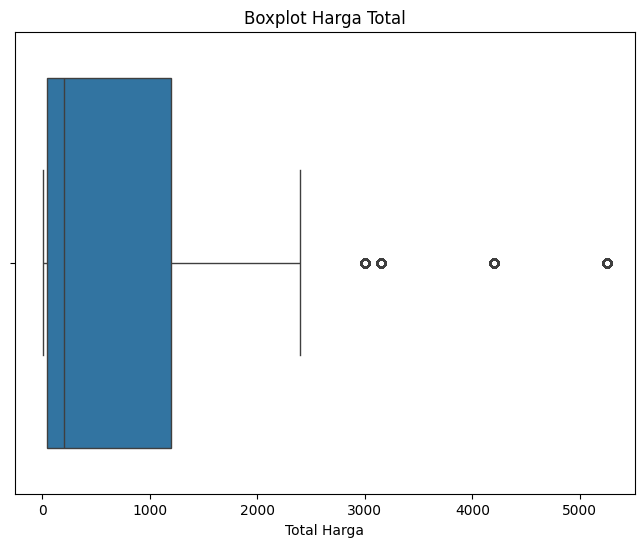

In [65]:
# Analisis outlier pada kolom price
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='price')
plt.title('Boxplot Harga Total')
plt.xlabel('Total Harga')
plt.show()

### 5. Analisis Metode Pembayaran


C:\Users\kuzup\AppData\Local\Temp\ipykernel_17460\1256481490.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='Set3')


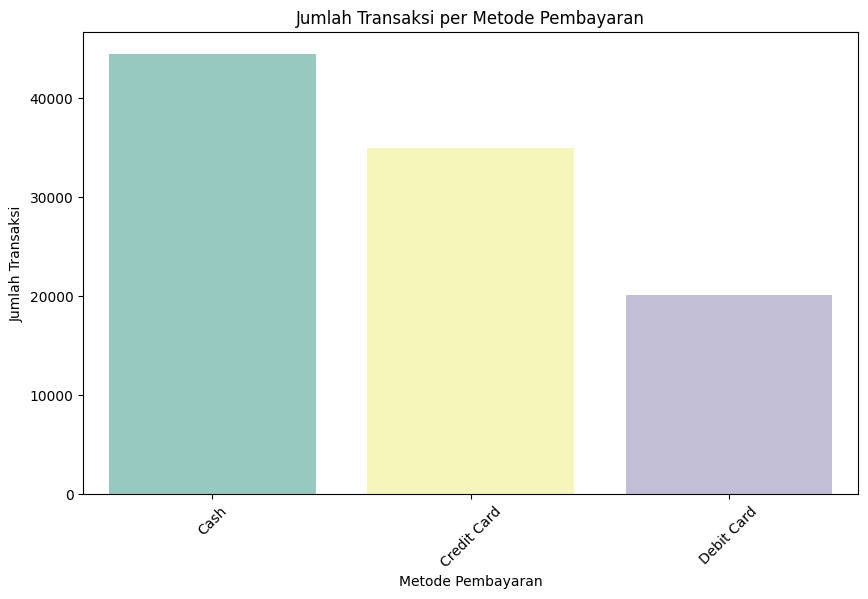

In [66]:
# Hitung jumlah transaksi per metode pembayaran
payment_counts = df['payment_method'].value_counts()

# Plot jumlah transaksi per metode pembayaran
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='Set3')
plt.title('Jumlah Transaksi per Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()

### 6. Analisis Pola Belanja Berdasarkan Kategori Produk


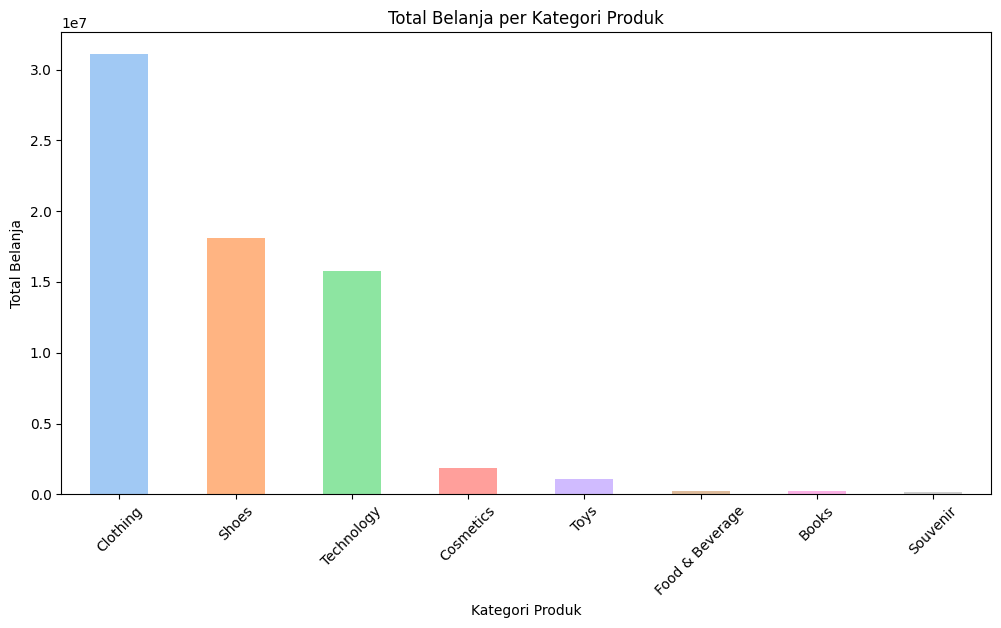

In [67]:
# Hitung total belanja per kategori produk
total_sales_per_category = df.groupby('category')['price'].sum().sort_values(ascending=False)

# Plot total belanja per kategori produk
plt.figure(figsize=(12, 6))
total_sales_per_category.plot(kind='bar', color=sns.color_palette('pastel', len(total_sales_per_category)))
plt.title('Total Belanja per Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Belanja')
plt.xticks(rotation=45)
plt.show()


### 7. Analisis Tren Harian Transaksi


C:\Users\kuzup\AppData\Local\Temp\ipykernel_17460\2679604752.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transaction_per_day.index, y=transaction_per_day.values, palette='rainbow')


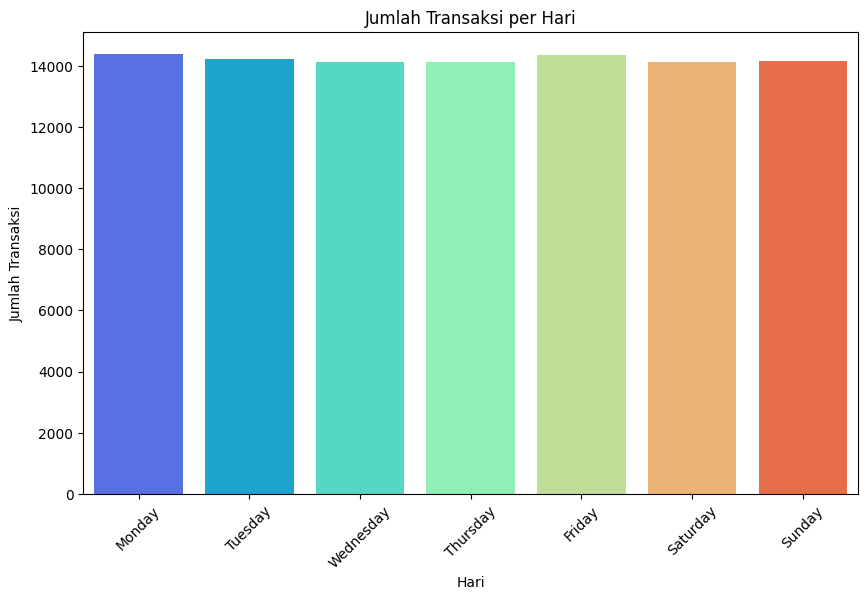

In [68]:
# Ekstrak hari dari kolom invoice_date
df['invoice_day'] = df['invoice_date'].dt.day_name()

# Hitung jumlah transaksi per hari
transaction_per_day = df['invoice_day'].value_counts()

# Urutkan berdasarkan urutan hari dalam seminggu
transaction_per_day = transaction_per_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot jumlah transaksi per hari
plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_per_day.index, y=transaction_per_day.values, palette='rainbow')
plt.title('Jumlah Transaksi per Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()

### 8. Segmentasi Pelanggan Berdasarkan Gender dan Metode Pembayaran


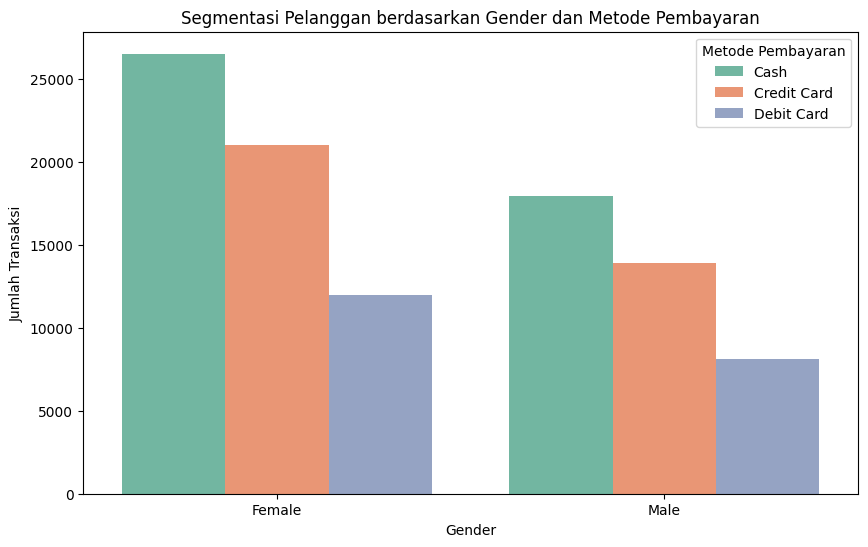

In [69]:
# Hitung jumlah transaksi per kombinasi gender dan metode pembayaran
gender_payment_counts = df.groupby(['gender', 'payment_method']).size().reset_index(name='count')

# Plot segmentasi pelanggan
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_payment_counts, x='gender', y='count', hue='payment_method', palette='Set2')
plt.title('Segmentasi Pelanggan berdasarkan Gender dan Metode Pembayaran')
plt.xlabel('Gender')
plt.ylabel('Jumlah Transaksi')
plt.legend(title='Metode Pembayaran')
plt.show()